In [84]:
# Step 1: Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('tree_optimization_data_even.csv')
df.head()

,total_land_area,total_trees,ghg_emission,air_quality_index,emission_quality,latitude,longitude,tree_sufficiency_rating
0,19352.465824,3304,437.722286,96.651554,0.882018,17.187210,83.295707,5
1,47585.001014,913,394.523756,81.779742,0.733922,33.592192,73.536845,2
2,36867.703149,4003,960.385059,197.041028,0.364437,14.867293,78.652428,3
3,30334.265726,3158,770.409006,176.594081,0.957661,11.969520,91.360192,3
4,8644.913382,3105,216.006343,223.697276,0.888964,24.708034,87.099851,6


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_land_area          10000 non-null  float64
 1   total_trees              10000 non-null  int64  
 2   ghg_emission             10000 non-null  float64
 3   air_quality_index        10000 non-null  float64
 4   emission_quality         10000 non-null  float64
 5   latitude                 10000 non-null  float64
 6   longitude                10000 non-null  float64
 7   tree_sufficiency_rating  10000 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 625.1 KB


In [87]:
df.describe()
'''
  Here the mean value of features is similar to that of 50% tile i.e mode. so there are no outliers present
'''

'\n  Here the mean value of features is similar to that of 50% tile i.e mode. so there are no outliers present\n'


```
# Step 2:
'''
  The above dataset is almost preprocessed so there is no of **preprocessing**
  Only it need to be scaled down using sklearn standard scaler library
'''
```



<Axes: xlabel='tree_sufficiency_rating', ylabel='Count'>

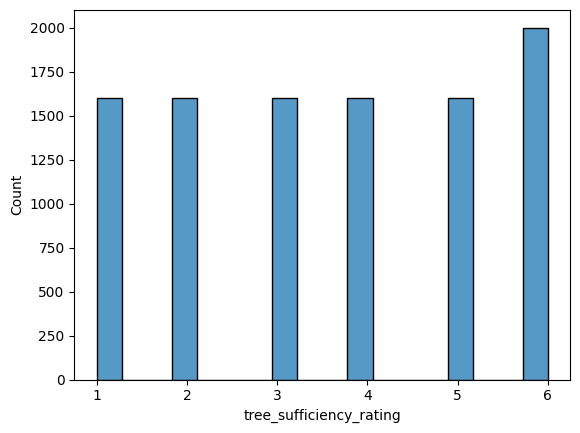

In [88]:
sns.histplot(df["tree_sufficiency_rating"])

In [89]:
train, test = np.split(df.sample(frac=1).reset_index(drop=True),  [int(0.7*len(df))] )
print(len(train), len(test))

7000 3000


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [90]:
# Step 4: Scaling data and Sampling it
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
def scaler_populator(dataframe, populate = False):

    X = dataframe[dataframe.columns[ :-1]].values
    Y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if populate:
        ros = RandomOverSampler()
        X , Y = ros.fit_resample(X,Y)

    dataframe = np.hstack((X, np.reshape(Y, (-1,1))))
    return dataframe, X,  Y


In [91]:
train, xtrain, ytrain = scaler_populator(train, populate=True)
test, xtest, ytest = scaler_populator(test)




<Axes: ylabel='Count'>

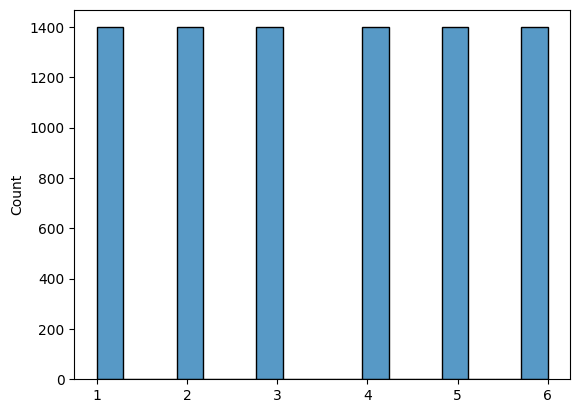

In [92]:
sns.histplot(ytrain)

# **Step** 5: Model Building

In [93]:
def evaluate(ypred, ytest):
  from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
  accuracy = accuracy_score(ytest, ypred)
  class_report = classification_report(ytest, ypred)
  print("Model Accuracy:", accuracy)
  print("Classification Report:\n", class_report)

In [94]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)

evaluate(ypred, ytest)

Model Accuracy: 0.9173333333333333
Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.95      0.96       487
           2       0.92      0.89      0.90       499
           3       0.88      0.87      0.87       498
           4       0.87      0.89      0.88       466
           5       0.88      0.93      0.91       449
           6       0.97      0.97      0.97       601

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [100]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(xtrain, ytrain)

ypred = logreg_model.predict(xtest)
evaluate(ypred, ytest)


Model Accuracy: 0.9516666666666667
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.96      0.98       487
           2       0.96      0.95      0.95       499
           3       0.95      0.90      0.92       498
           4       0.90      0.92      0.91       466
           5       0.92      0.98      0.95       449
           6       0.99      0.99      0.99       601

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



In [113]:
# Artificial neural nets
from tensorflow.keras.models import Sequential  # Build NN
from tensorflow.keras.layers import Dense

In [114]:
# init a model
ann = Sequential()
# create and add Hidden layer
ann.add(Dense(units=8, activation="relu"))  #HL
ann.add(Dense(units=16, activation="relu"))  #HL

#lets create op layer
ann.add(Dense(units=7, activation="softmax"))  #op

In [115]:
# writing code for optimization
ann.compile("adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [116]:
# model
ann.fit(xtrain,ytrain,epochs=25, batch_size=32)

Epoch 1/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1949 - loss: 1.8590
Epoch 2/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4950 - loss: 1.1837
Epoch 3/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7362 - loss: 0.7484
Epoch 4/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8324 - loss: 0.5279
Epoch 5/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8972 - loss: 0.3941
Epoch 6/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9343 - loss: 0.3050
Epoch 7/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9489 - loss: 0.2495
Epoch 8/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9579 - loss: 0.2117
Epoch 9/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9642 - loss: 0.1889
Epoch 10/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9678 - loss: 0.1674
Epoch 11/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9669 - loss: 0.1599
Epoch 12/25
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [117]:
ypred=ann.predict(xtest)
ypred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.42259549e-13, 9.96645093e-01, 3.35498387e-03, ...,
        1.67071627e-15, 5.15548879e-20, 1.77570026e-25],
       [1.80473145e-38, 0.00000000e+00, 0.00000000e+00, ...,
        2.24324947e-31, 1.84753463e-10, 9.99999940e-01],
       [2.10743984e-19, 7.13784569e-25, 4.60249588e-10, ...,
        3.22428465e-01, 8.91667185e-09, 1.24833799e-23],
       ...,
       [1.11662302e-16, 8.15474176e-28, 3.58605155e-19, ...,
        3.55893353e-05, 9.99927461e-01, 3.68460096e-05],
       [5.11707149e-32, 9.99999821e-01, 1.44562790e-07, ...,
        1.26093981e-37, 0.00000000e+00, 0.00000000e+00],
       [1.03773184e-20, 1.03236805e-03, 9.98965979e-01, ...,
        1.78772135e-18, 9.49523329e-28, 0.00000000e+00]], dtype=float32)

In [118]:
import numpy as np

ypred = np.argmax(ypred, axis=1)

final_pred = []
for pred in ypred:
  if pred == 0:
    final_pred.append("-")
  elif pred == 1:
    final_pred.append("Very low")
  elif pred == 2:
    final_pred.append("Low")
  elif pred == 3:
    final_pred.append("Medium")
  elif pred == 4:
    final_pred.append("Might need more trees in future")
  elif pred == 5:
    final_pred.append("Might not need more trees in future")
  elif pred == 6:
    final_pred.append("Overpopulated")
  else:
    final_pred.append("Unknown")
final_pred


['Very low',
 'Overpopulated',
 'Medium',
 'Overpopulated',
 'Very low',
 'Might need more trees in future',
 'Might not need more trees in future',
 'Might need more trees in future',
 'Overpopulated',
 'Very low',
 'Very low',
 'Low',
 'Might need more trees in future',
 'Overpopulated',
 'Low',
 'Medium',
 'Medium',
 'Medium',
 'Might need more trees in future',
 'Medium',
 'Might not need more trees in future',
 'Overpopulated',
 'Low',
 'Overpopulated',
 'Medium',
 'Overpopulated',
 'Might not need more trees in future',
 'Might not need more trees in future',
 'Overpopulated',
 'Might not need more trees in future',
 'Very low',
 'Low',
 'Medium',
 'Might need more trees in future',
 'Medium',
 'Might need more trees in future',
 'Very low',
 'Medium',
 'Low',
 'Medium',
 'Might need more trees in future',
 'Overpopulated',
 'Medium',
 'Medium',
 'Low',
 'Overpopulated',
 'Low',
 'Medium',
 'Low',
 'Might not need more trees in future',
 'Very low',
 'Low',
 'Overpopulated',
 'Lo

# **Conclusion**

>**Note:**
The Required Dataset was not avaliable hence the current Dataset
is Generated from **LLM** models

>This model can predict wheather the Given industy or a particular industrial sector has enough number of trees or not.
It also predicts weather they would need more trees in future.

>The accuracy with the ANN is highest as compared to Traditional ML models
*  **ANN -> 98%**
*  **Logistic Regression -> 96%**
*  **Decision Tree -> 93%**


*Made with love ♥*



